# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [161]:

# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [162]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

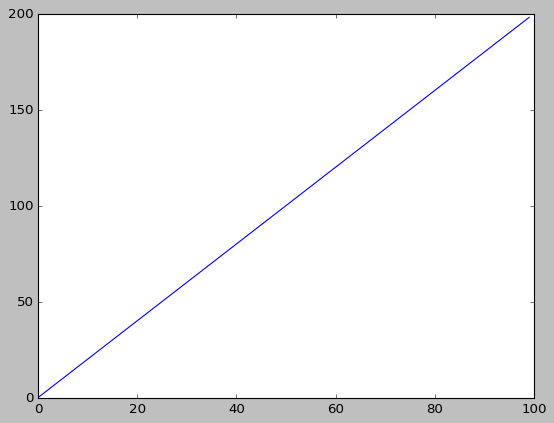

In [163]:
# Method 1    
plt.plot(x,y)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

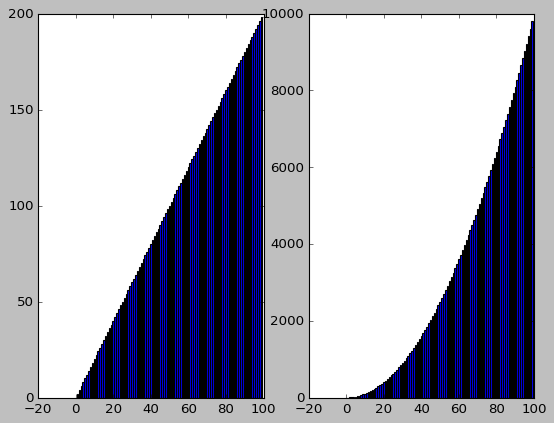

In [164]:
# Method 2
plot_options, (chart_1, chart_2) = plt.subplots(nrows=1, ncols=2)
chart_1.bar(x,y)
chart_2.bar(x,z)

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

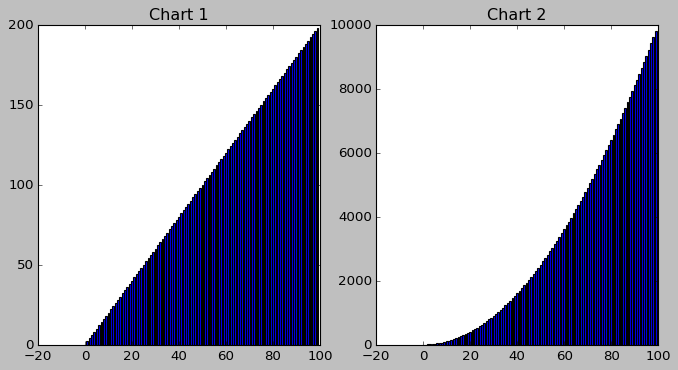

In [165]:
# your code here
plot_options, (chart_1, chart_2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
chart_1.bar(x,y)
chart_1.set_title('Chart 1')
chart_2.bar(x,z)
chart_2.set_title('Chart 2')
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

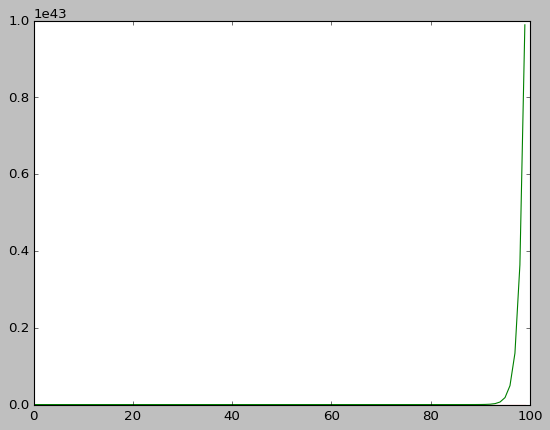

In [166]:
# your code here
y1 = x**2
y2 = np.exp(x)

plt.plot( y1, color= 'r')
plt.plot( y2, color= 'g') 

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

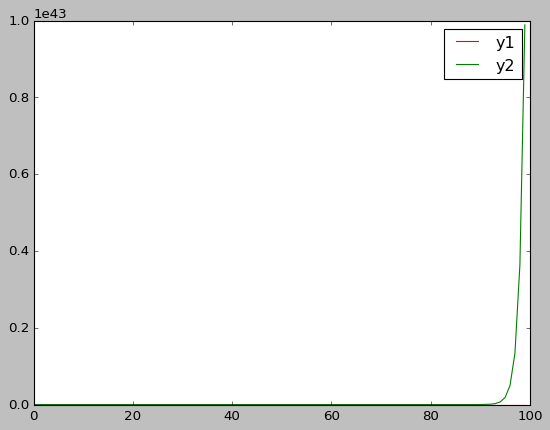

In [167]:
# your code here
plt.plot( y1, color= 'r', label= 'y1')
plt.plot( y2, color= 'g', label= 'y2')
plt.legend()
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [168]:
# your code here
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

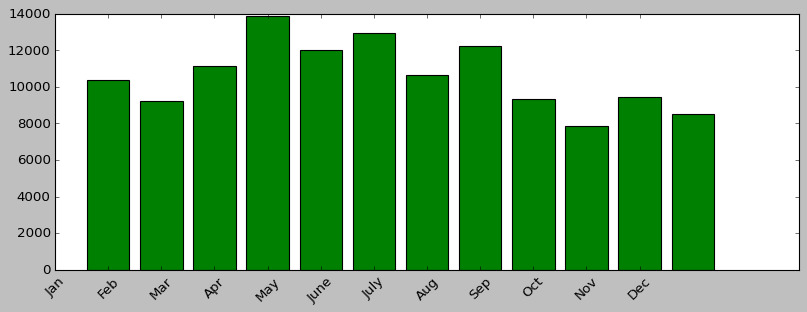

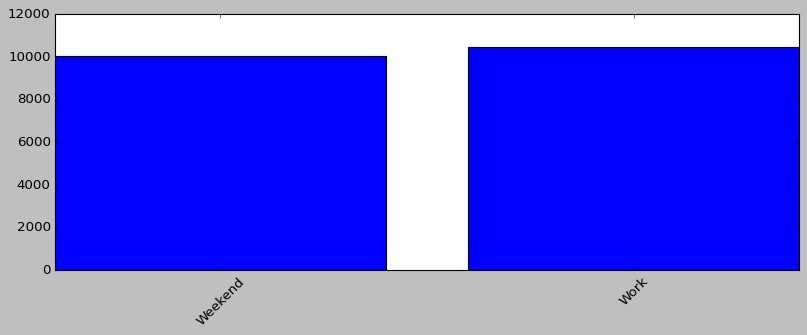

In [169]:
# MEDIAN STEPS BY MONTH_ENCODED
fitbit_steps_month = fitbit.groupby(['Months_encoded']).agg({'Steps': 'median'})
fitbit_steps_month = pd.DataFrame(fitbit_steps_month).reset_index()

plt.figure(figsize= (12,4))
plt.bar(fitbit_steps_month['Months_encoded'], fitbit_steps_month['Steps'], color='g')
plt.xticks(fitbit_steps_month.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.savefig('/Users/jmpcs/Desktop/Ironhack/Labs/lab-matplotlib-seaborn/your-code/fugires/fitbit_steps_month.png', dpi = 300)
plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND
fitbit_steps_work = fitbit.groupby(['Work_or_Weekend']).agg({'Steps': 'median'})
fitbit_steps_work = pd.DataFrame(fitbit_steps_work).reset_index()
plt.figure(figsize= (12,4))
plt.bar(fitbit_steps_work['Work_or_Weekend'], fitbit_steps_work['Steps'], color='b')
plt.xticks([0,1], ['Weekend', 'Work'], rotation=45)
plt.savefig('/Users/jmpcs/Desktop/Ironhack/Labs/lab-matplotlib-seaborn/your-code/fugires/fitbit_steps_work.png', dpi = 300)
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

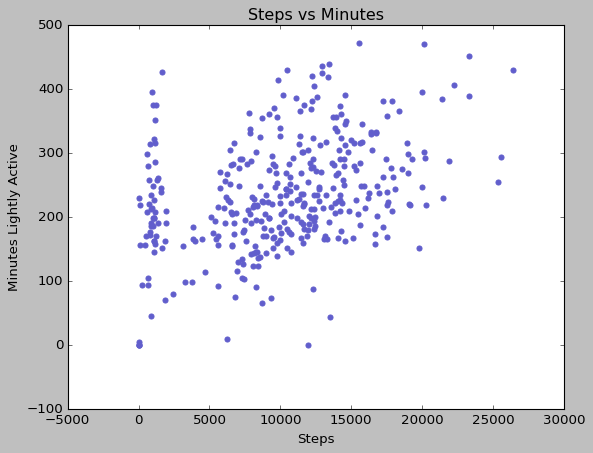

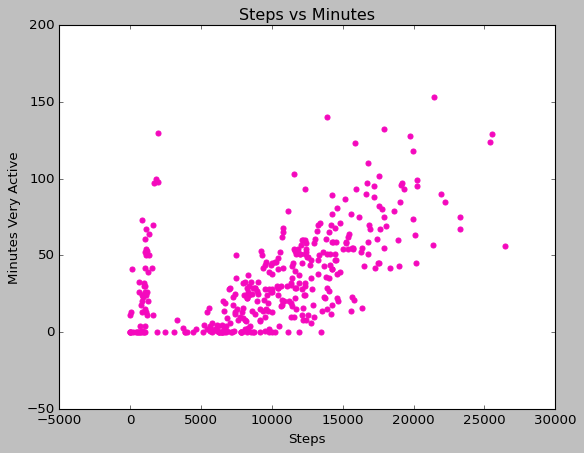

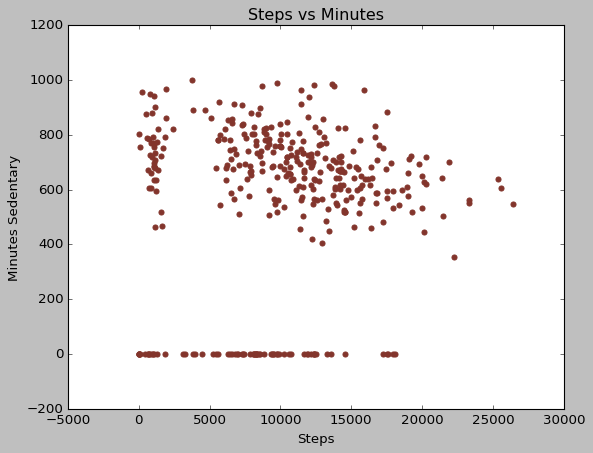

In [170]:
# your code here
cols = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary' ]

for col in cols:
    plt.figure()
    plt.title('Steps vs Minutes')
    plt.xlabel('Steps')
    plt.ylabel(col)
    plt.scatter(fitbit['Steps'], fitbit[col], color=np.random.rand(3,))
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [171]:
# your code here
titanic= pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [172]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [173]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes('int64')

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0
...,...,...,...,...
1304,1305,3,0,0
1305,1306,1,0,0
1306,1307,3,0,0
1307,1308,3,0,0


In [174]:
titanic.select_dtypes('float64')

,Survived,Age,Fare
0,0.0,22.000000,7.2500
1,1.0,38.000000,71.2833
2,1.0,26.000000,7.9250
3,1.0,35.000000,53.1000
4,0.0,35.000000,8.0500
...,...,...,...
1304,NaN,29.513190,8.0500
1305,NaN,39.000000,108.9000
1306,NaN,38.500000,7.2500
1307,NaN,29.513190,8.0500


In [175]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes('object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [176]:
# your code here
import matplotlib.style
import matplotlib as mpl

#### Use the right visulalization to show the distribution of column `Age`.

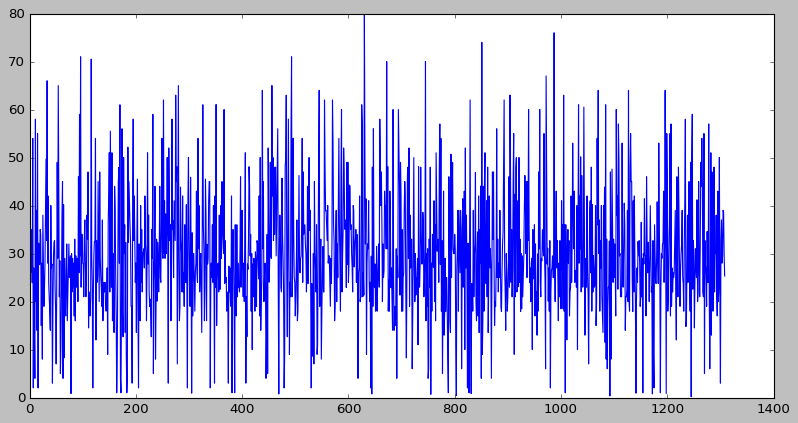

In [177]:
# your code here
plt.figure(figsize=(12,6))
titanic['Age'].plot()
mpl.style.use('classic')
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [178]:
# your code here
import seaborn as sns

C:\Users\jmpcs\AppData\Local\Temp\ipykernel_10308\1820976194.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'], bins=10, ax=axes[0], color='r')
C:\Users\jmpcs\AppData\Local\Temp\ipykernel_10308\1820976194.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'], bins=2

<AxesSubplot: xlabel='Age', ylabel='Density'>

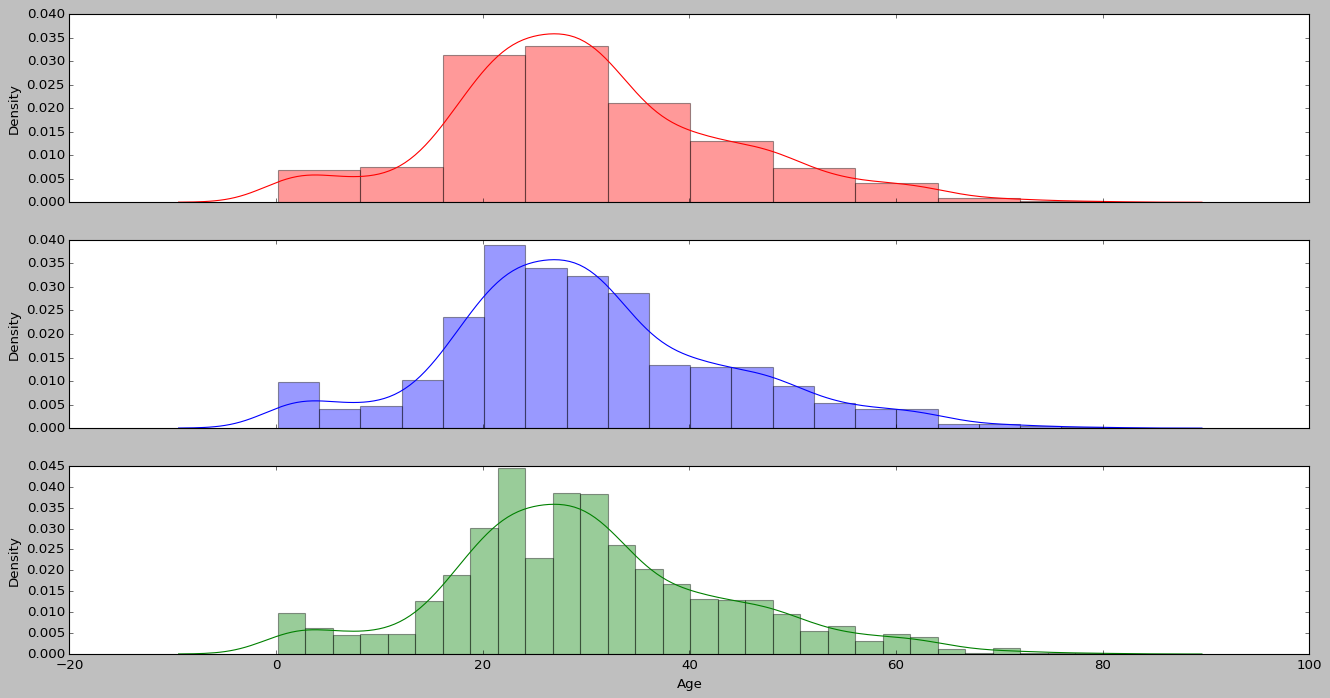

In [179]:
fig, axes = plt.subplots(3,1 ,sharex=True, figsize=(20,10))

sns.distplot(titanic['Age'], bins=10, ax=axes[0], color='r')
sns.distplot(titanic['Age'], bins=20, ax=axes[1], color='b')
sns.distplot(titanic['Age'], bins=30, ax=axes[2], color='g')

#### How does the bin size affect your plot?

In [180]:
"""
Diving into the bins provides a clearer view of the age distribution. It appears that there were more people between 20-40 years old and fewer individuals over 60 years old. This suggests that the boat was primarily occupied by families with young children.
"""

'\nDiving into the bins provides a clearer view of the age distribution. It appears that there were more people between 20-40 years old and fewer individuals over 60 years old. This suggests that the boat was primarily occupied by families with young children.\n'

#### Use seaborn to show the distribution of column `Age`.

C:\Users\jmpcs\AppData\Local\Temp\ipykernel_10308\1666659936.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

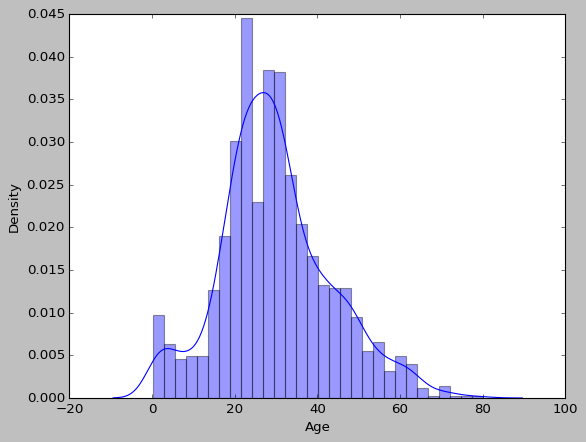

In [181]:
# your code here
sns.distplot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [182]:
gender = titanic['Gender'].value_counts().head()
gender = pd.DataFrame(gender).reset_index() 
graf_gender = gender.groupby("index").agg({"Gender":"sum"})
graf_gender

,Gender
index,
female,466
male,843


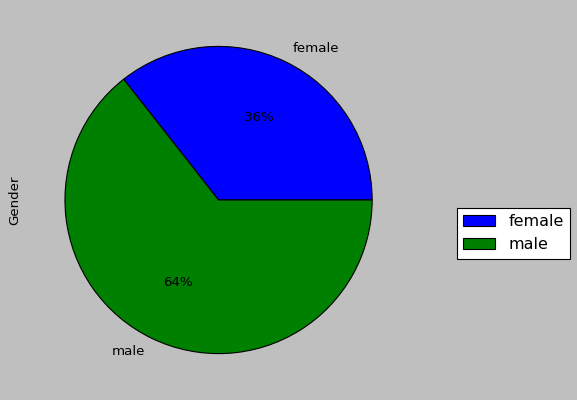

In [183]:
# Method 1 - matplotlib
# your code here
graf_gender.plot.pie(y='Gender',autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.1,0.5), loc="upper left")
plt.show()

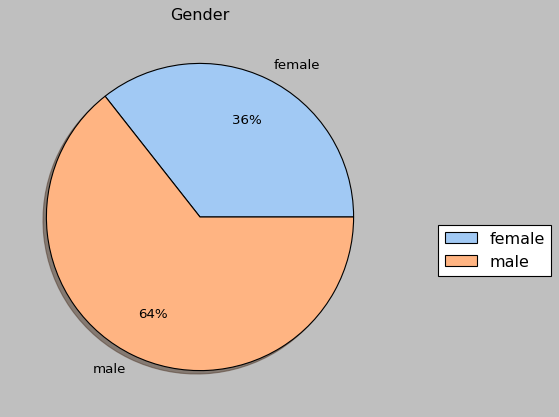

In [184]:
# Method 2 - seaborn
# your code here
colors = sns.color_palette('pastel')


graf_gender.groupby("index").agg({"Gender":"sum"}).plot(kind='pie', y='Gender', 
        autopct='%1.0f%%', pctdistance=.7,
          colors=colors, shadow=True).set_title("Gender")
plt.legend(bbox_to_anchor=(1.1,0.5), loc="upper left")
plt.ylabel("")
plt.show()

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot: >

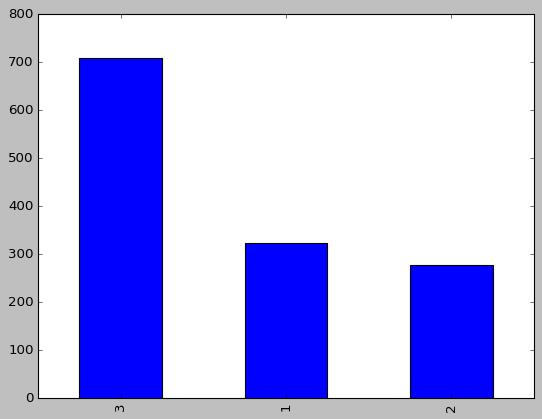

In [185]:
# your code here
titanic['Pclass'].value_counts().plot.bar()


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

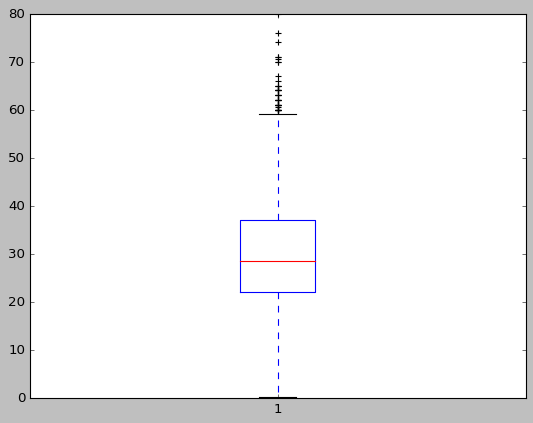

In [186]:
# your code here
plt.boxplot(titanic.Age)
plt.show()

In [187]:
"""
Boxplots provide insight into both the central tendency and spread of a distribution, as well as identifying any possible outliers that could be present.
"""

'\nBoxplots provide insight into both the central tendency and spread of a distribution, as well as identifying any possible outliers that could be present.\n'

#### What does the last plot tell you about the feature `Age`?

In [188]:
"""
The average age is around 30 years old, with outliers being observed in the over-60 age group.
"""

'\nThe average age is around 30 years old, with outliers being observed in the over-60 age group.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

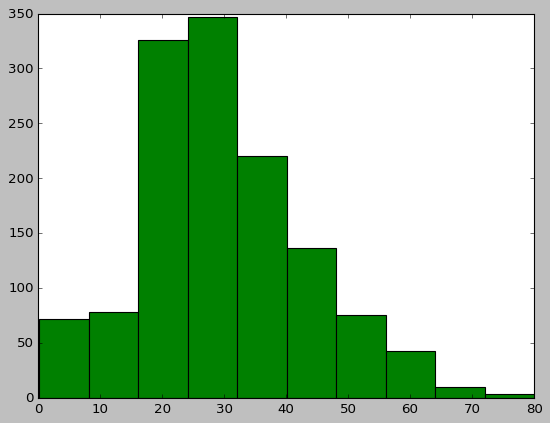

In [189]:
# your code here
plt.hist(titanic.Age, color='g')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [190]:
"""
Prettier? Kidding. It allows us to view the distribution by age.
"""

'\nPrettier? Kidding. It allows us to view the distribution by age.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

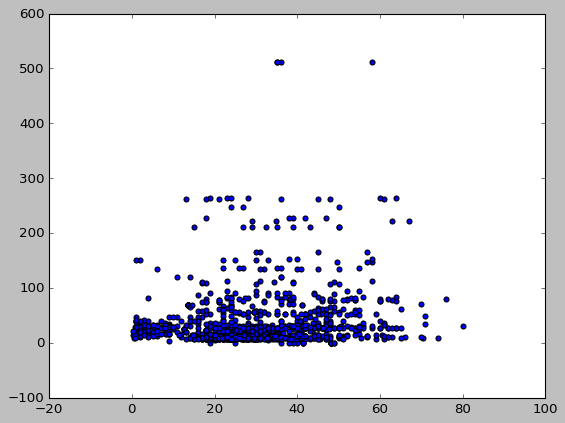

In [191]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic.Age, titanic.Fare)
plt.show() 

<AxesSubplot: xlabel='Age', ylabel='Fare'>

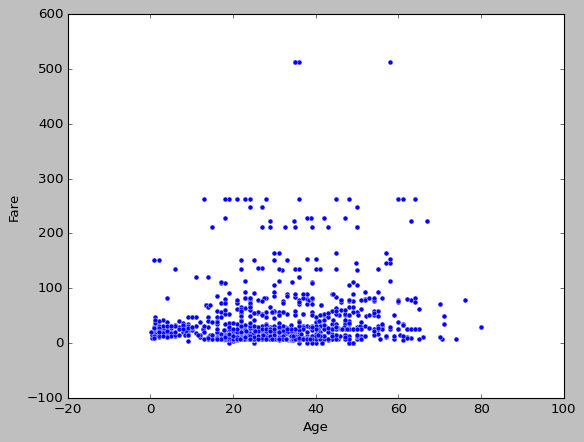

In [192]:
# Method 2 - seaborn
# your code here
sns.scatterplot(data=titanic, x="Age", y="Fare")

#### Plot the correlation matrix using seaborn.

C:\Users\jmpcs\AppData\Local\Temp\ipykernel_10308\214613496.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(titanic.corr())
C:\Users\jmpcs\AppData\Local\Temp\ipykernel_10308\214613496.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(titanic.corr())
C:\Users\jmpcs\AppData\Local\Temp\ipykernel_10308\214613496.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), annot= True, mask= matrix)


<AxesSubplot: >

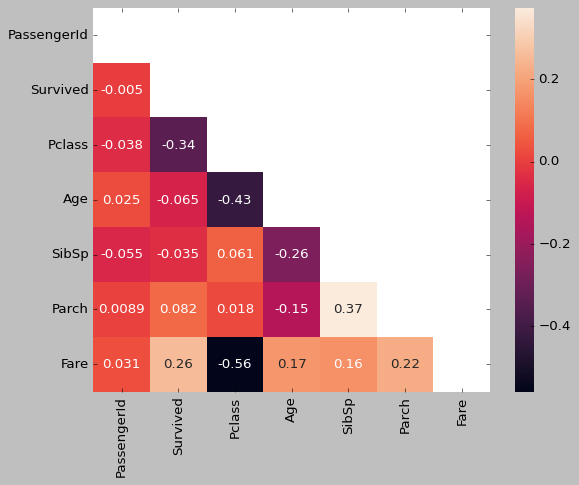

In [193]:
# your code here
matrix = np.triu(titanic.corr())

matrix = np.triu(titanic.corr()) 

sns.heatmap(titanic.corr(), annot= True, mask= matrix)

#### What are the most correlated features?

In [197]:
"""
Fare and Survived, and Parch and Silbsp
"""

'\nFare and Survived, and Parch and Silbsp\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

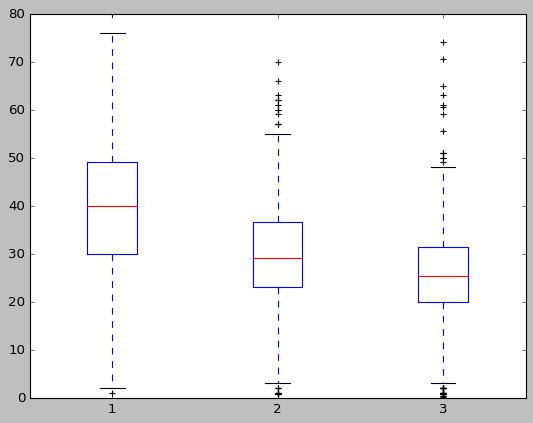

In [198]:
# your code here
plt.boxplot([titanic.loc[titanic['Pclass'] == 1, 'Age'], titanic.loc[titanic['Pclass'] == 2, 'Age'], titanic.loc[titanic['Pclass'] == 3, 'Age']])
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

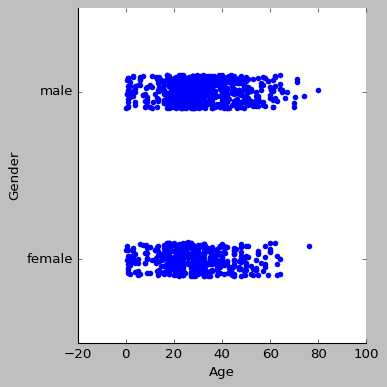

In [199]:
# your code here
sns.catplot(x= 'Age', y= 'Gender', data= titanic)